In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt

In [3]:
df_merged = pd.read_csv('merged_ML.csv', index_col=0)

In [4]:
import seaborn as sns

In [5]:
from sklearn.ensemble import IsolationForest

In [6]:
model = IsolationForest(random_state=0)

In [7]:
model.fit(df_merged)
inliers = model.predict(df_merged)==1

In [14]:
df_merged.shape[0] - inliers.sum() 

5525

Text(0.5, 1.0, 'Outliers removidos')

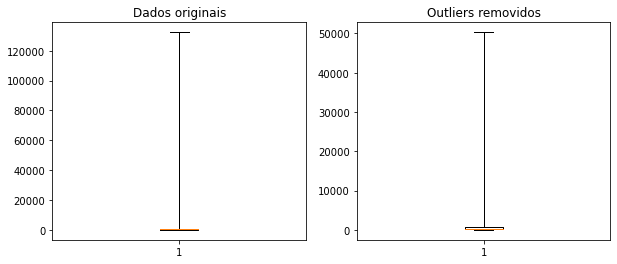

In [8]:
plt.subplots(1,2, figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(df_merged['price'], whis=1000)
plt.title('Dados originais')

plt.subplot(1,2,2)
plt.boxplot(df_merged[inliers]['price'], whis=1000)
plt.title('Outliers removidos')

In [68]:
#higher = mroe normal
foo = model.score_samples(df_merged)
print(foo.max())
print(foo.min())
print(foo.shape)
foo[:10]

-0.3717744082513695
-0.6792590149754808
(35485,)


array([-0.53843981, -0.44330408, -0.53564194, -0.51487404, -0.50658442,
       -0.53868106, -0.47259658, -0.51148807, -0.40354675, -0.4849484 ])

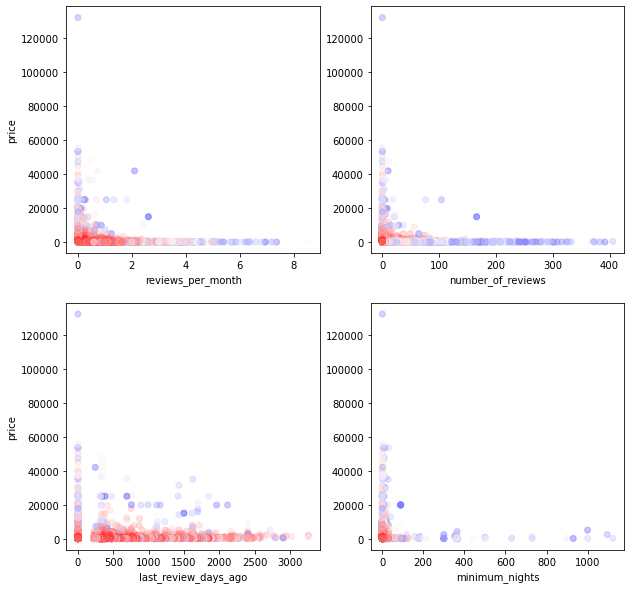

In [69]:
plt.subplots(2,2, figsize=(10,10))
index = ['reviews_per_month', 'number_of_reviews','last_review_days_ago' , 'minimum_nights']
for k in range(0, 4):
    plt.subplot(2,2,k+1)
    plt.scatter(df_merged[index[k]], 
                df_merged['price'], 
                alpha=0.4, 
                c=foo,
                cmap='bwr')
    plt.xlabel(index[k])
    if not k%2: plt.ylabel('price')

In [29]:
df_merged

price  minimum_nights  number_of_reviews  reviews_per_month  \
0        191               7                251               2.08   
1        424               5                 94               1.22   
2        159               7                238               1.95   
3        344               2                282               2.33   
4        482               2                181               2.23   
...      ...             ...                ...                ...   
35583    128               3                  1               1.00   
35584    139               1                  3               3.00   
35605    139               1                  3               3.00   
35640    128               1                  2               2.00   
35648    185               1                  1               1.00   

       calculated_host_listings_count  availability_365  literate  pop_total  \
0                                   1               287     99.07   147021.0   
1                                   1                93     99.27    46808.0   
2                                   3               154     99.07   147021.0   
3                                   1                 0     99.27    46808.0   
4                                   1               170     99.27    46808.0   
...                               ...               ...       ...        ...   
35583                               5               104     93.95   100822.0   
35584                               5               109     93.95   100822.0   
35605                               5               110     93.95   100822.0   
35640                               5                79     93.95   100822.0   
35648                              11               360     99.27    46808.0   

       age_proportion  room_type Entire home/apt  room_type Hotel room  \
0            0.458506                          1                     0   
1            0.481542                          1                     0   
2            0.458506                          1                     0   
3            0.481542                          1                     0   
4            0.481542                          1                     0   
...               ...                        ...                   ...   
35583        0.759437                          1                     0   
35584        0.759437                          1                     0   
35605        0.759437                          1                     0   
35640        0.759437                          1                     0   
35648        0.481542                          1                     0   

       room_type Private room  room_type Shared room  name_lan_int  
0                           0                      0             0  
1                           0                      0             0  
2                           0                      0             0  
3                           0                      0             0  
4                           0                      0             0  
...                       ...                    ...           ...  
35583                       0                      0             0  
35584                       0                      0             0  
35605                       0                      0             0  
35640                       0                      0             0  
35648                       0                      0             0  

[20666 rows x 14 columns]

Text(0.5, 0, 'normality_score (higher = more normal)')

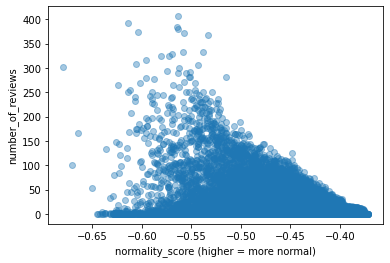

In [78]:
plt.scatter(foo, df_merged['number_of_reviews'], alpha=0.4)
plt.ylabel('number_of_reviews')
plt.xlabel('normality_score (higher = more normal)')


In [72]:
from scipy.stats import spearmanr
stat, p = spearmanr(foo, df_merged['price'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.211, p=0.000
Probably dependent
